# LINEAR REGRESSION

#### To perform linear regression on this data, and train the model for prediction. After training, evaluate the model with MAE, MSE, and RMSE. 

#### Check Homoscedasticity 

- Homoscedasticity means that the residuals (differences between observed and predicted values) have constant variance across all levels of the predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
path = "C:/Users/sidiq/OneDrive/Desktop/Linear-Reg/Linear-Regression/DATA/student_scores.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [5]:
df.shape

(25, 2)

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

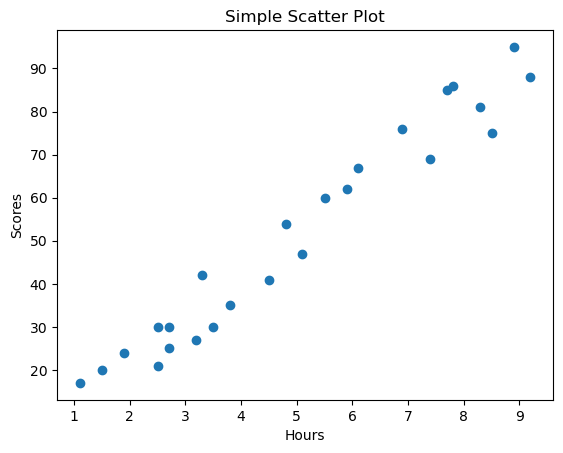

In [7]:
plt.scatter(df['Hours'], y = df['Scores'])
plt.title("Simple Scatter Plot")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [8]:
correlation_matrix = df.corr()
print(correlation_matrix)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


##### The correlation coefficient between the number of hours spent studying and the scores obtained is 0.97. This indicates a strong linear relationship between the two variables, suggesting that as the number of hours spent studying increases, the scores tend to increase as well.

In [9]:
X = df['Hours'].values
Y = df['Scores'].values

In [10]:
X = X.reshape(-1,1)

In [11]:
Y = Y.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_test, X_train, y_test , y_train = train_test_split(X,Y, test_size=0.4, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X)

In [16]:
print(y_pred)

[[27.85947669]
 [53.46262999]
 [34.75263334]
 [86.94367662]
 [37.70684334]
 [18.01211003]
 [93.83683328]
 [57.40157665]
 [84.97420329]
 [29.82895002]
 [79.06578329]
 [61.34052331]
 [47.55421   ]
 [35.73737001]
 [14.07316337]
 [90.88262328]
 [27.85947669]
 [21.95105669]
 [63.30999665]
 [76.1115733 ]
 [29.82895002]
 [50.50841999]
 [40.66105334]
 [71.18788997]
 [80.05051996]]


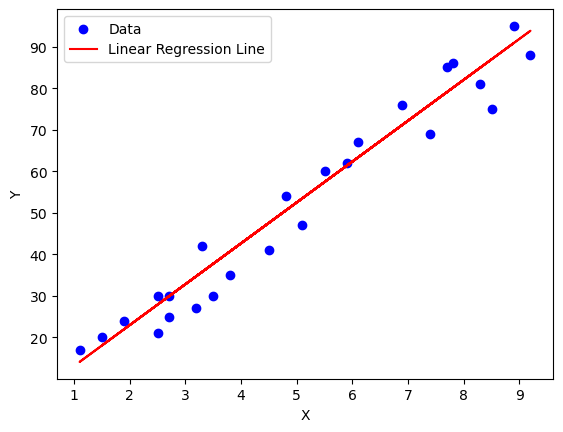

In [17]:
plt.scatter(X,Y, color = "Blue", label = 'Data')
plt.plot(X,y_pred, color ='Red' , label = "Linear Regression Line")
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error 

mae = mean_absolute_error(Y,y_pred)
print("Mean Absolute Error is = " , mae)

Mean Absolute Error is =  4.859304931231131


In [19]:
from sklearn.metrics import mean_squared_error 

msq = mean_squared_error(Y,y_pred)
print("Mean Squared Error is = " , msq)

Mean Squared Error is =  30.159672050910384


In [20]:
print("Root Mean Squared Error is; RMSE = " , np.sqrt(msq))

Root Mean Squared Error is; RMSE =  5.491782229013673


## To Check Homoscedasticity 

- Homoscedasticity means that the residuals (differences between observed and predicted values) have constant variance across all levels of the predicto

For this we can make use of following
   
   - Graphical Test
   - Statistical Test

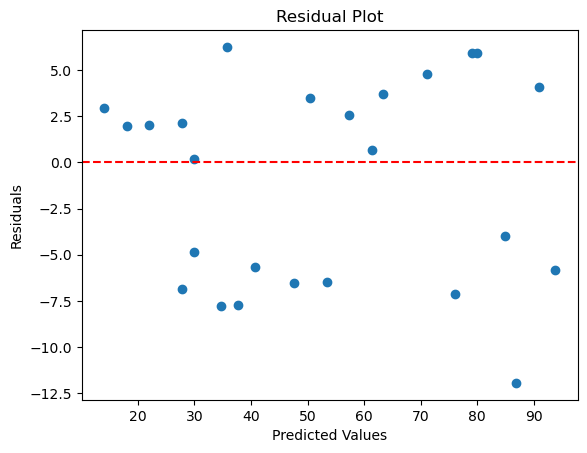

In [25]:
### Graphical Test

residuals = Y - y_pred

plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

------------

In [ ]:
# Statistical Test

Breusch-Pagan Test: A statistical test for homoscedasticity. It tests the null hypothesis that the variance of the residuals is constant across the range of data.

In [24]:
import statsmodels.api as sm

from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the test
bp_test = het_breuschpagan(residuals, sm.add_constant(X))
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 2.428072360913072, 'p-value': 0.1191793723864109, 'f-value': 2.4741202964116766, 'f p-value': 0.12939065243841838}


Since p value = 0.1191 > typical 0.05 no evidence against the null hypothesis

So we can continue our assumption of homoscedasticity